# IMDB Movie Analysis 🎬

As a data analyst intern at IMDB, you have been tasked with exploring and analyzing the IMDB
Movies dataset. Your goal is to answer specific business questions, gain insights into movie
trends, and deliver actionable recommendations. Using Python and libraries such as Pandas,
NumPy, Seaborn, and Matplotlib, perform analysis to help IMDB better understand genre
popularity, rating trends, and factors influencing movie success.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Libraries & Their Uses in This Project

- pandas  → Used for loading, cleaning, and analyzing the dataset (e.g., handling missing values, grouping data).
- numpy → Used for numerical operations, like handling arrays and calculating statistical measures.
- matplotlib → Used for creating static visualizations, such as histograms, scatter plots, and line graphs.
- seaborn  → Used for advanced statistical visualizations, like heatmaps, box plots, and correlation plots.

### Project Setup and Data Loading

In [3]:
# Loading the dataset
df = pd.read_csv("imdb_movies.csv")
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


### 2.Data Overview and Basic Exploration

In [4]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


- **Rows:** Each row represents a unique movie and contains details like its title, genre,
release date, rating, and other attributes.
- **Columns:** Each column represents a feature or attribute of the movies, such as genre,
budget_x, revenue, etc.

In [4]:
#Characteristics of each column using .describe()
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


### 3.Data Cleaning

Address missing values, data types, and outliers.

In [5]:
# Convert date_x to datetime format
df['date_x'] = pd.to_datetime(df['date_x'])

#To get the sum of all null values
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

**Missing Values:** Genre column have 85 missing values which contains Genres of movies and Crew column have 56 missing values which contains crew information.

In [7]:
#Filling null values with "unavailable"
df['genre'] = df["genre"].fillna("unavailable")
df["crew"] = df["crew"].fillna("unavailable")
df.isnull().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

### 4.Univariate Analysis: Explore each column individually.

Perform univariate analysis on numerical and categorical variables.

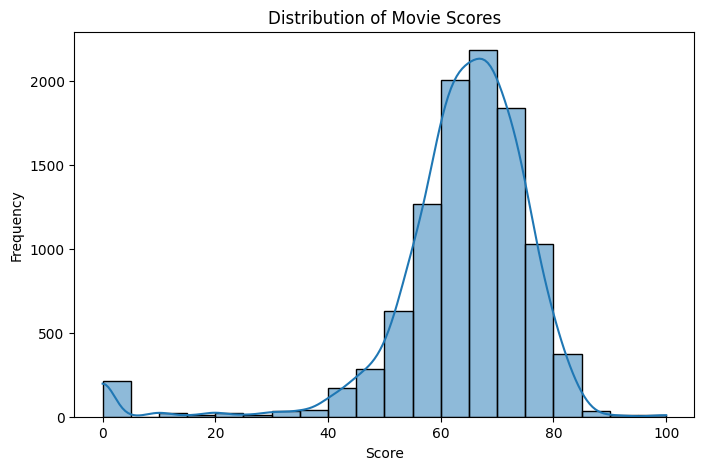

In [8]:
# Distribution of movie runtimes using Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['score'], bins=20, kde=True)
plt.title('Distribution of Movie Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

The histogram shows a left-skewed (negative skewness) distribution, indicating that most data points are concentrated at higher values, while fewer observations exist at the lower end. This suggests that the majority of movies have relatively high ratings or revenue, with only a few experiencing extremely low values.

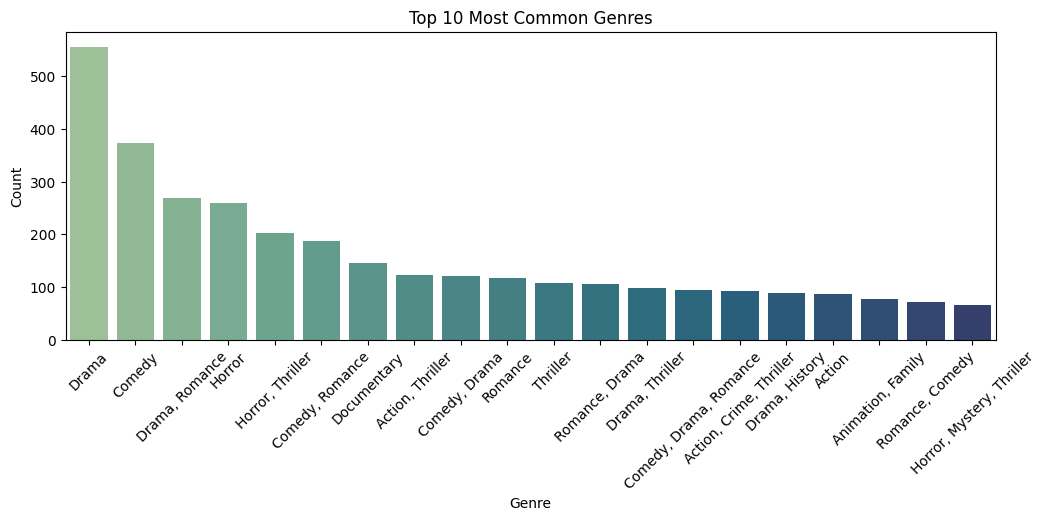

In [14]:
# Identifying Most common genres using a bar chart

#Group by genre and count the number of movies
gb = df.groupby("genre").agg({"names":"count"})
gb = gb.sort_values(by = "names",ascending = False)
gb = gb.head(20)

#Plot the bar chart
plt.figure(figsize=(12,4))
sns.barplot(x=gb.index,y=gb["names"],data=gb,hue=gb.index,palette = "crest")
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 5.Bivariate Analysis: Explore relationships between two variables

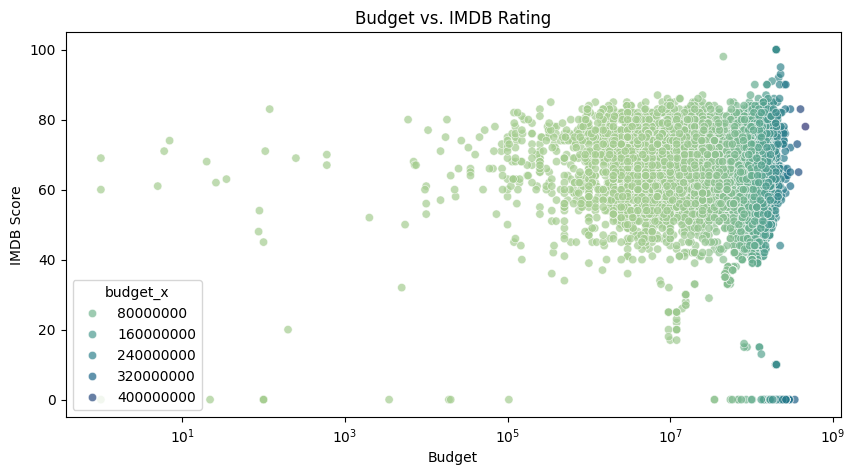

In [17]:
#Calculating the relationship between rating and budget(as runtime is not available in data)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["budget_x"], y=df["score"], hue=df["budget_x"], palette="crest", alpha=0.7)
plt.title("Budget vs. IMDB Rating")
plt.xlabel("Budget")
plt.ylabel("IMDB Score")
plt.xscale("log")
plt.show()

- High-budget movies mostly have ratings between 6 and 8, but no strong correlation is seen between budget and rating.
- Low-budget films show more variability, with some receiving very high or very low ratings.
- A horizontal cluster at 0 suggests missing ratings or poorly received films.

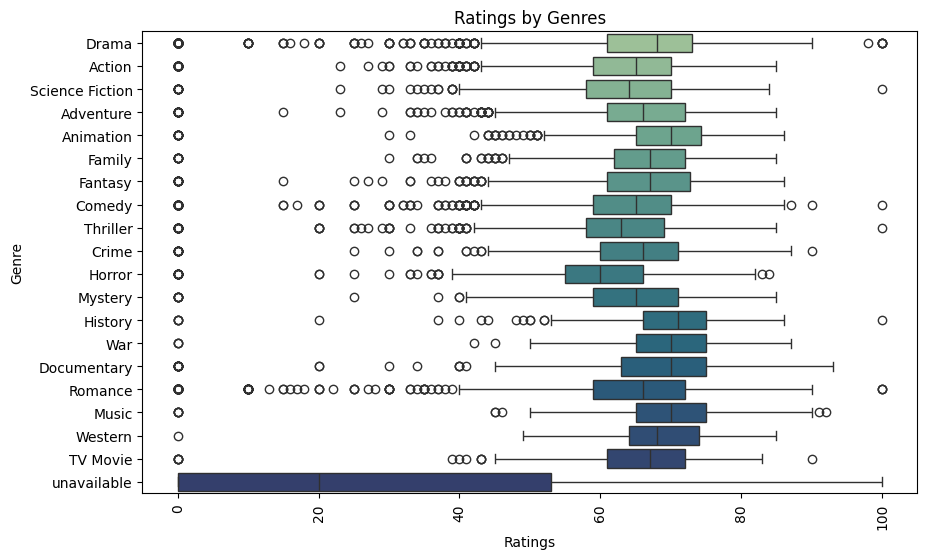

In [21]:
#Calculating the Ratings by Genres

# Ensure genres are properly split and reset the index
df_exploded = df.copy()
df_exploded["genre"] = df_exploded["genre"].str.split(",")
df_exploded = df_exploded.explode("genre").reset_index(drop=True)

# Boxplot for IMDB scores by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_exploded["score"], y=df_exploded["genre"].str.strip(), hue=df_exploded["genre"].str.strip(), palette="crest", legend=False)
plt.title("Ratings by Genres")
plt.xlabel("Ratings")
plt.ylabel("Genre")
plt.xticks(rotation=90)
plt.show()

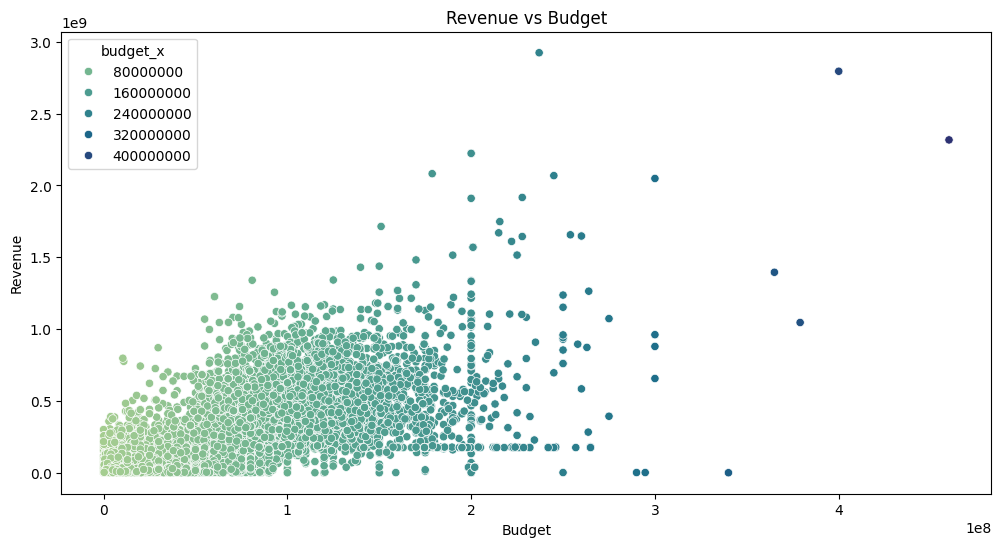

In [23]:
#plotting the relationship between Revnue and Budget
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget_x', y='revenue', data=df, hue='budget_x', palette="crest")
plt.title('Revenue vs Budget')
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.show()

In [23]:
#calculating the corr. between budget and revenue
correlation = df['budget_x'].corr(df['revenue'])
print(correlation)

0.6738295691763742


The correlation between budget and revenue is positive and moderately strong, indicating that higher budgets generally lead to higher revenue. However, since the value is not extremely close to 1 (0.9 or 0.8), it suggests that while budget plays a role, other factors also influence revenue, making high earnings not entirely guaranteed.

### 6.Genre-Specific Analysis

In [40]:
# Calculate the average rating for each genre
avg_rating_by_genre = df.groupby("genre")["score"].mean().sort_values(ascending=False)
avg_rating_by_genre = avg_rating_by_genre.head(10)
print("\nAverage Ratings by Genre:")
print(avg_rating_by_genre)


Average Ratings by Genre:
genre
Adventure, Animation, Comedy, Fantasy, Mystery                                            85.000000
Fantasy, Drama, Crime                                                                     85.000000
Romance, Animation, Drama                                                                 85.000000
Animation, Comedy, Romance                                                                84.666667
TV Movie, Animation, Science Fiction, Action, Adventure, Comedy, Drama, Fantasy, Music    83.000000
Family, Animation, Drama                                                                  83.000000
Animation, Thriller                                                                       83.000000
Animation, Action, Science Fiction, Drama                                                 83.000000
Animation, Family, Fantasy, Adventure, Comedy                                             83.000000
Adventure, Fantasy, Action, Family                                 

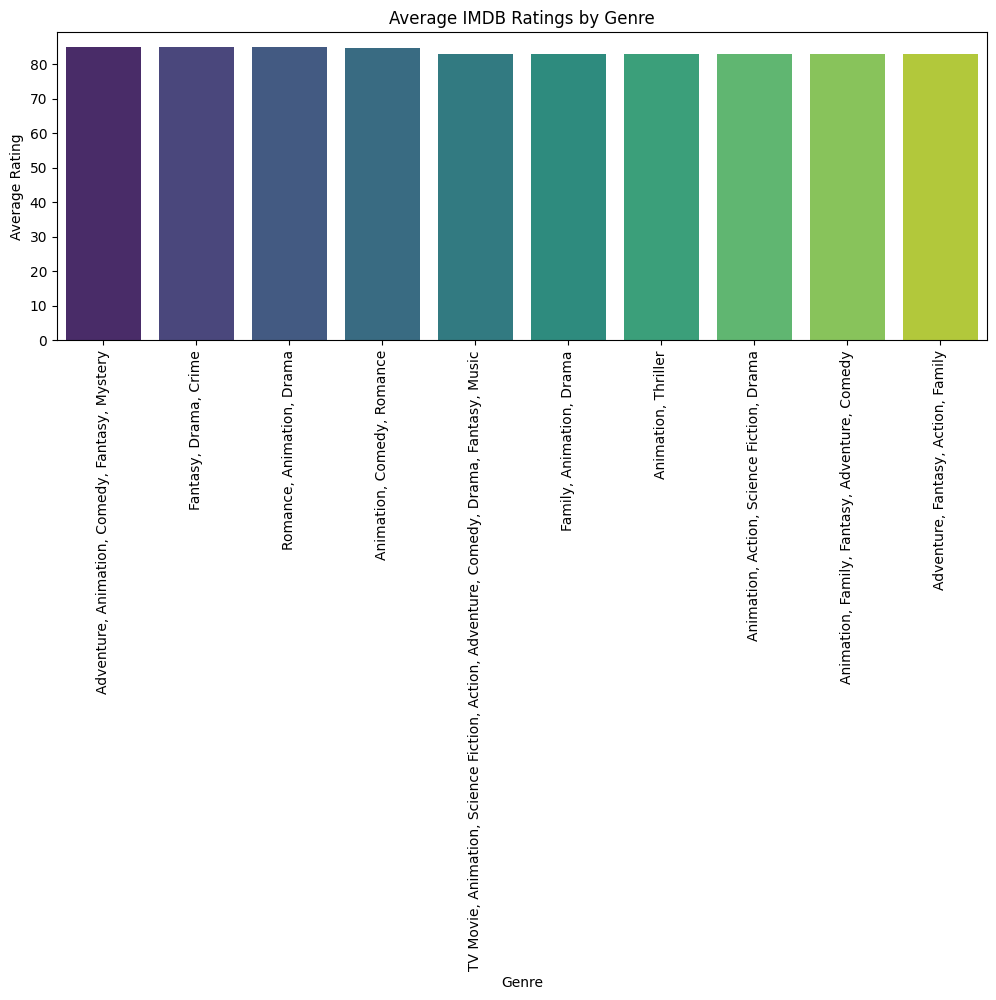

In [42]:
# Plot the graph of average score across genres
plt.figure(figsize=(12, 4))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values,
hue=avg_rating_by_genre.index, palette='viridis', legend=False)
plt.title("Average IMDB Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

#### How does the popularity of genres vary over time? Plot the number of movies released per genre each year.


In [10]:
# Getting year from the date_x column
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')
df['year'] = df['date_x'].dt.year
print(df[['date_x', 'year']].head())

      date_x  year
0 2023-03-02  2023
1 2022-12-15  2022
2 2023-04-05  2023
3 2023-01-05  2023
4 2023-03-17  2023


In [11]:
# Group by genre and sum the total movie counts
movies_per_genre = df.groupby(['year', 'genre']).size().reset_index(name='movie_count')
top_genres = movies_per_genre.groupby('genre')['movie_count'].sum().nlargest(10).index

# Filtering movies data to get only top genres
filtered_movies = movies_per_genre[movies_per_genre['genre'].isin(top_genres)]

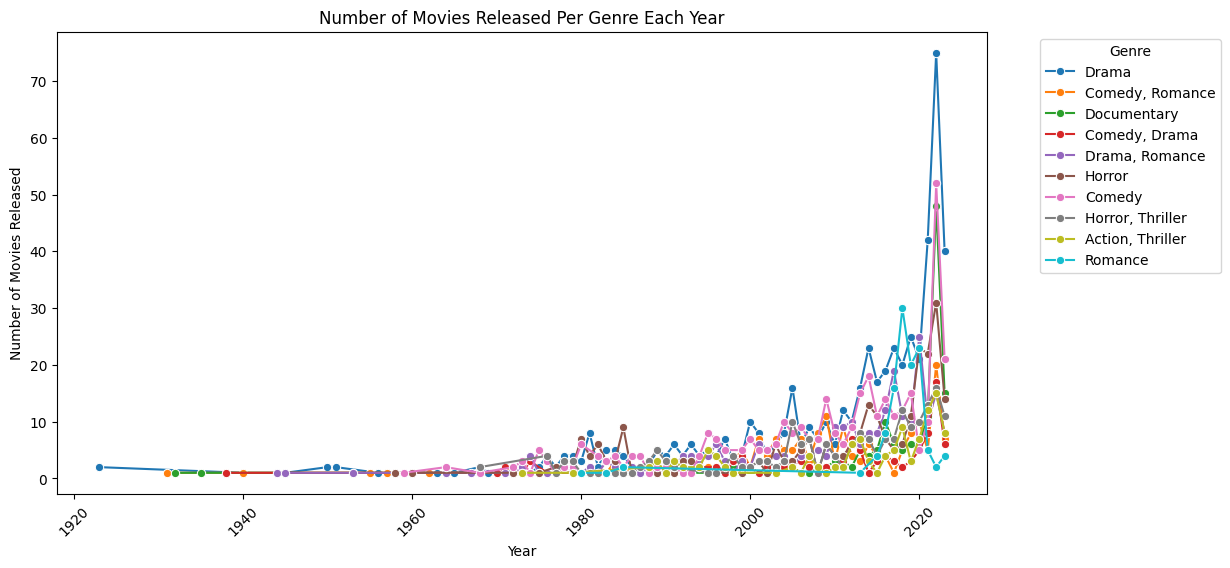

In [56]:
#Line Plot with Distinct Colors
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', palette="tab10", marker='o')
plt.title("Number of Movies Released Per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### 7. Year and Trend Analysis



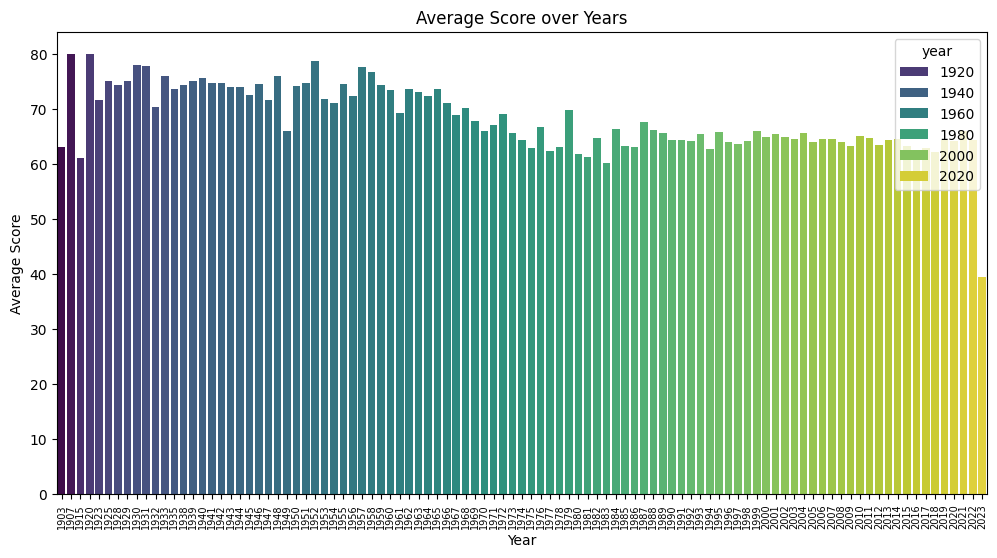

In [12]:
# Plot the average score across years
gb3 = df.groupby('year').agg({'score':'mean'})
plt.figure(figsize = (12, 6))
sns.barplot(x = gb3.index, y = gb3['score'], data = gb3, hue = gb3.index, palette = 'viridis')
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.title('Average Score over Years')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

In [14]:
# Group by year and count movies
movies_per_year = df.groupby('year').size().reset_index(name='movie_count')

# Find the year with the highest and lowest releases
highest_releases_year = movies_per_year.loc[movies_per_year['movie_count'].idxmax()]
lowest_releases_year = movies_per_year.loc[movies_per_year['movie_count'].idxmin()]

print(f"Year with Most Releases: {highest_releases_year['year']} ({highest_releases_year['movie_count']} movies)")
print(f"Year with Least Releases: {lowest_releases_year['year']} ({lowest_releases_year['movie_count']} movies)")

Year with Most Releases: 2022 (954 movies)
Year with Least Releases: 1903 (1 movies)


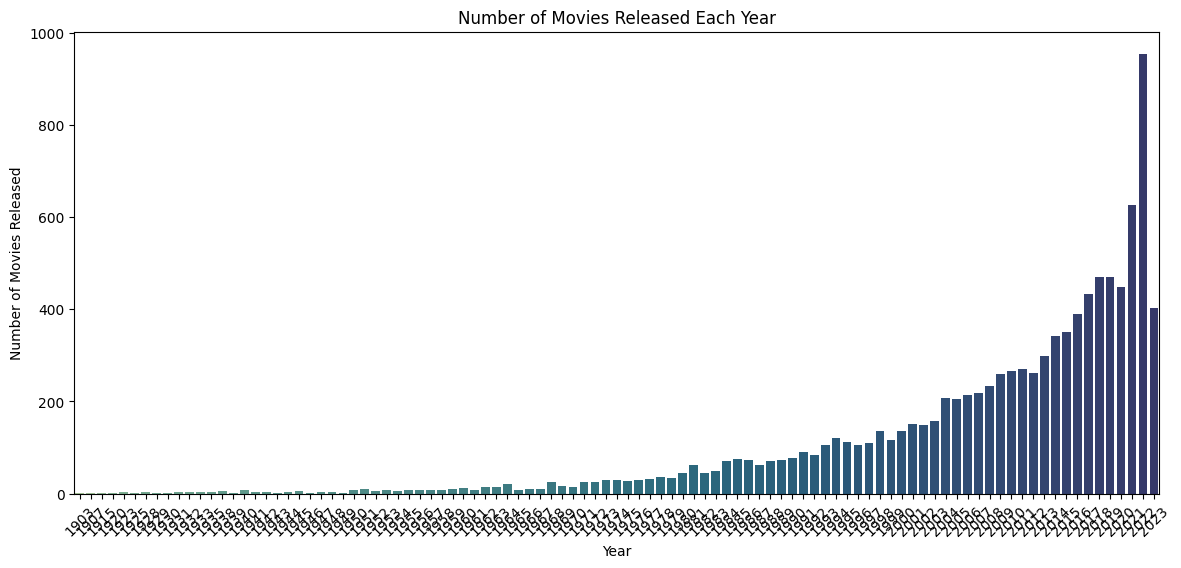

In [17]:
#Bar Chart for Movies Releases Per Year
plt.figure(figsize=(14, 6))
sns.barplot(x='year', y='movie_count', data=movies_per_year, hue='year', palette="crest", legend=False)
plt.title("Number of Movies Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.show()

### 8.Multivariate Analysis: Analyze multiple variables together

Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.


In [21]:
# Create a 'decade' column by rounding down the year to the nearest 10
df['decade'] = (df['year'] // 10) * 10  

# Explode genres to separate multiple genres per movie
df_exploded = df.copy()
df_exploded['genre'] = df_exploded['genre'].str.split(',')
df_exploded = df_exploded.explode('genre')

# Group by decade and genre, count occurrences
genre_by_decade = df_exploded.groupby(['decade', 'genre']).size().reset_index(name='count')

# Get the top 5 genres per decade
top_genres_per_decade = genre_by_decade.sort_values(['decade', 'count'], ascending=[True, False])
top_genres_per_decade = top_genres_per_decade.groupby('decade').head(5)  # Keep top 5 per decade

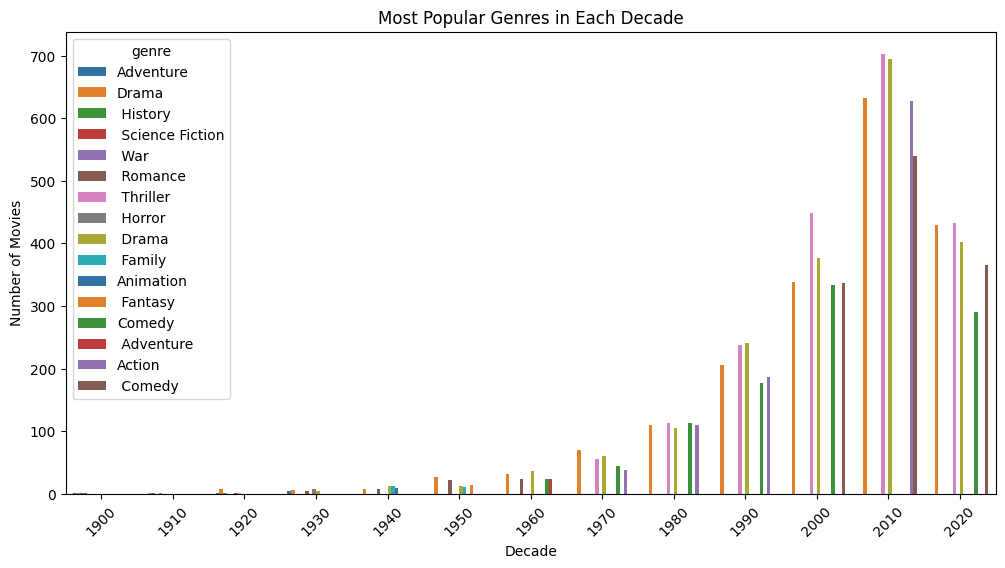

In [25]:
#Bar Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_per_decade, x='decade', y='count', hue='genre', palette="tab10")
plt.title("Most Popular Genres in Each Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

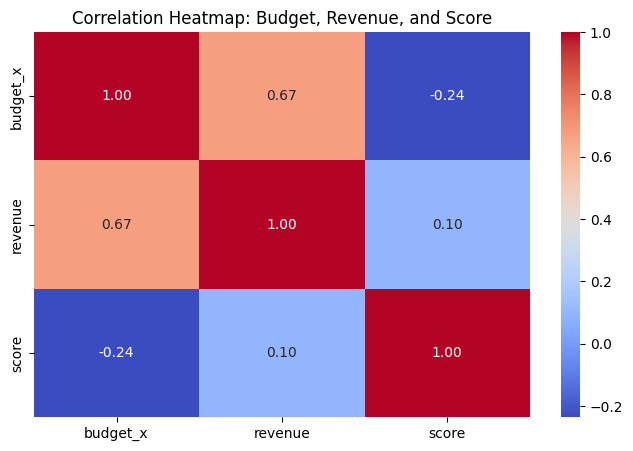

In [26]:
#Calculating relationships between budget, revenue, scores.
plt.figure(figsize=(8, 5))
sns.heatmap(df[['budget_x', 'revenue', 'score']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Budget, Revenue, and Score")
plt.show()

In [33]:
#Top rated genres and years

# Group by genre and year to get average ratings
genre_year_ratings = df_exploded.groupby(["year", "genre"])["score"].mean().reset_index()

# Find top-rated genres
top_rated_genres = genre_year_ratings.groupby("genre")["score"].mean().nlargest(5)
print("Top 5 Highest-Rated Genres:\n", top_rated_genres)

# Find top-rated years
top_rated_years = genre_year_ratings.groupby("year")["score"].mean().nlargest(5)
print("Top 5 Highest-Rated Years:\n", top_rated_years)

Top 5 Highest-Rated Genres:
 genre
 History     70.812901
Western      69.900000
Animation    69.476385
 War         69.467684
 Drama       69.453455
Name: score, dtype: float64
Top 5 Highest-Rated Years:
 year
1907    80.000000
1920    80.000000
1952    79.416667
1930    78.000000
1931    77.545455
Name: score, dtype: float64


### 9.Insights & Summary from IMDB Movie Analysis

#### Key Findings About Movie Trends, Popular Genres & Ratings

#### Top-Rated Years
The years with the highest average movie ratings include 1907, 1920, 1952, 1930, and 1931. This suggests that earlier movies, possibly due to selective releases, had consistently strong ratings.

#### Budget vs. Revenue Relationship
A strong correlation (~0.67) between budget and revenue was observed, meaning higher-budget movies generally earn more. However, some low-budget movies still perform exceptionally well.

#### Most Popular Genres by Decade
- **1920s-1950s**: Drama & Romance dominated.
- **1980s-2000s**: Action & Adventure became more dominant.
- **2010s-Present**: Sci-Fi & Fantasy saw significant growth.

#### Movie Release Trends
The highest number of movies was released in 2022 (954 movies), while the lowest was in 1903 (1 movie). The number of movies released has increased significantly over time.

### What Other Data Would Be Helpful?

This analysis provides key insights into movie trends, genre popularity, and factors influencing success. However, additional data on marketing budgets, audience demographics, and streaming impact could further enhance the findings. Understanding how different studios, directors, and lead actors influence ratings and revenue would provide deeper insights into industry trends.

Incorporating critic scores from Metacritic and Rotten Tomatoes, along with sentiment analysis from user reviews, could help compare audience and critic perceptions. Financial factors such as advertising spend, streaming vs. theatrical performance, and distribution formats would also be valuable in assessing what drives a movie’s commercial and critical success.